<a href="https://colab.research.google.com/github/juanchess98/Notebooks-Deep-Learning/blob/regresion-logistica/Regresi%C3%B3n_Logistica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresión Logística

La regresión logística es un métdo de clasificación binaria, es decir, la variable dependiente sólo puede tomar dos valores: Verdadero ó Falso, 1 ó 0, etc.

Se denomina regresión logística ya que el corazón del método es la llamada función logística o función sigmoide, la cual es de la forma:

\begin{equation}
  \sigma(z)=\frac{1}{1+e^{-z}}
\end{equation}

Se usa el método de regresión logística para modelar variables dependientes binarias en lugar de la regresión lineal, ya que esta última, para valores que se encuentran en los extremos de la recta predicha entrega valores menores a cero y mayores a uno. Esto va en contra de la definición teórica de probabilidad, según la cual estas están en el rango $[0, 1]$.

Entonces el método de regresión logística utiliza la recta generada por la regresión lineal pero la pasa por la función sigmoide para que el resultado siempre esté entre 0 y 1. En otras palabras, el problema de regresión se convierte en un problema de clasificación.

Dado un conjunto de datos, suponemos que podemos modelarlo con una expresión matemática de la forma:

\begin{equation}
y=wx+b
\end{equation}

Esta ecuación es una representación lineal de la relación que existe entre los datos de entrada $x$ (características) y la salida $y$. Donde $y$ se puede expresar de la forma:


\begin{equation}
\hat{y}^{(i)}=w_0+w_1x_1^{(i)}+w_2x_2^{(i)}+...+w_nx_n^{(i)}
\end{equation}

Para clasificación se necesita acotar este resultado a valores de $y$ entre $[0, 1]$ por lo que necesitamos pasar este resultado a través de la función de activación sigmoide:

 \begin{equation}
  \sigma(\hat y)=P(\hat{y}^{(i)}=1)=\frac{1}{1+e^{-(w_0+w_1x_1^{(i)}+w_2x_2^{(i)}+...+w_nx_n^{(i)})}}
\end{equation}

Para realizar el entrenamiento queremos minimizar una función de costo por medio de gradiente descendente. Esta función que elegimos se llama "Entropía binaria cruzada".



Gráficamente la función sigmoide tiene la siguiente forma:

In [2]:
import helpers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
%load_ext autoreload
%autoreload 2

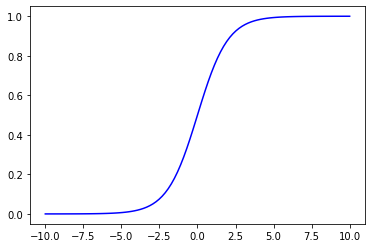

In [4]:
sigmoide = lambda x: 1/(1+np.exp(-x))
senal = helpers.crear_db(sigmoide, ruido=0, rango=(-10, 10))
helpers.plot_data(senal[0], senal[1], label='Sigmoide')

### Función de costo

Ya que estamos en la tarea de realizar un clasificador binario, esto lo que implica es que se debe diseñar un clasificador que distinga entre dos clases. Es decir, que dada una característica pueda decir a que clase pertenece o cual es la probabilidad de que pertenezca a una de las dos clases.

Al entrenar un modelo para predecir entre estas dos clases, este entregará la probabilidad de que un dato de entrada cualquiera pertenezca a una de las dos clases.

La tarea que cumple la función de costo es predecir que tan buena o mala es esta predicción. Para esto se debe encontrar el argumento que minimice la función por medio de un optimizador como, por ejemplo, gradiente descendente. 

Habiendo encontrado este punto mínimo se puede decir que valores altos de la función de costo indican una mala predicción y valores bajos buenas predicciones.

Una función de costo típica en problemas de clasificación binaria es la función de entropía cruzada binaria.

### Función entropía cruzada binaria

La función entropía cruzada binaria tiene la siguiente expresión matemática:

$$H_p(q)= -\frac{1}{N} \sum_{i=1}^{N}y_i \cdot log(p(y_i))+(1-y_i) \cdot log(1-p(y_i))$$


Donde $y$ es el vector de etiquetas y $p(y)$ la probabilidad de que dicha etiqueta pertenezca a la clase(...), y N es el número total de datos de entrenamiento.

Esta expresión matemática se deriva del concepto de entropía, que es una medida de la incertidumbre asociada a una distribución de probabilidad $q(y)$.

En este orden de ideas, si todos los puntos de la distribución pertenecen a una misma clase la incertidumbtre sería de igual a $0$. Y en el peor de los casos, cuando la mitad de los datos pertenecen a una clase y la otra mitad pertenecen a la otra clase, la entropía viene dada por la siguiente expresión:

$$H(q)=log(2)$$

Para todos los otros casos la entropía viene dada por:

$$H(q)=-\sum_{c=1}^C q(y_c) \cdot log(q(y_c))$$

Sin embargo, en el caso del aprendizaje de máquinas no se conoce la distribución $q(y)$ a priori, sino que tratamos de aproximarnos a ella mediante otra distribución $p(y)$. Es decir, se asume que los datos vienen de $p(y)$ pero se sabe que en realidad obedecen la distribución $q(y)$.

Esto se conoce como la entropía cruzada entre las dos distribuciones y se puede expresar de la siguiente forma:

$$H_p(q)=-\sum_{c=1}^{C} q(y_c) \cdot log(p(y_c))$$

Idealmente $H(q)=H_p(q)$ pero para que esto se de las dos distribuciones deben ser iguales también $q(y)=p(y)$, pero esto es poco probable, teniendose que en la mayoría de los casos la entropía cruzada $H_p(q)$ es mayor a la entropía $H(q)$.

$$H_p(q)-H(q) \geq 0$$

Esta diferencia se conoce como la divergencia de Kullback-Leibler y sirve para medir la disimilaridad entre las dos distribuciones:

$$D_{KL}(q||p)=H_p(q)-H(q)=\sum_{c=1}^{C} q(y_c) \cdot [log(q(y_c))-log(p(y_c))]$$

La anterior expresión indica que entre más cerca esté $p(y)$ de $q(y)$, menor será el valor de la divergencia y, por lo tanto, menor la entropía cruzada.

La tarea de un clasificador es entonces encontrar la distribución el mejor $p(y)$ que minimice la entropía cruzada.

Durante el entrenamiento, el clasificador usa los $N$ datos de entrenamiento para calcular la función de costo y encontrar la distribución $p(y)$ óptima:

$$H_p(q)=-\frac{1}{N}\sum_{c=1}^{C} log(p(y_i))$$

Con un poco de manipulación matemática se tiene que para cualquier dato:

$$H_p(q)= -\frac{1}{N} \sum_{i=1}^{N}y_i \cdot log(p(y_i))+(1-y_i) \cdot log(1-p(y_i))$$

# Implementacion de Regresión Logística en Keras de Tensorflow 2

#### Se carga la API Keras corriendo sobre la plataforma Tensorflow 2.

In [6]:
import tensorflow.keras as keras
import tensorflow as tf

#### Se crean datos artificiales con la clase datasets de sklearn.

En este ejercicio se crean 100 datos aleatorios repartidos en dos clases. Estos datos se dividen luego en 80% para clasificación 10% para validación y el 10% restante para prueba.

In [5]:
from sklearn import datasets
import matplotlib.pyplot as plt

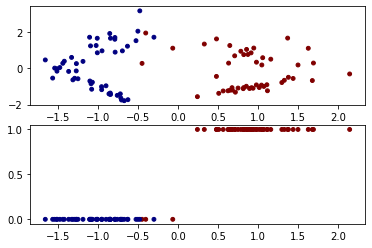

In [7]:
X_, y_ = datasets.make_classification(n_samples=100, n_features = 2, random_state=1, n_redundant=0)

fig = plt.figure()#(figsize=(5.0, 4.0))
ax = fig.add_subplot(211)
ax.scatter(X_[:,0],X_[:,1],s=15,c=y_.squeeze(),cmap='jet')

ax1 = fig.add_subplot(212)
r=np.where(sigmoide(X_[:,0]) > 0.5, 1, 0)
ax1.scatter(X_[:,0], r, s=15,c=y_.squeeze(),cmap='jet')

## 1. Implementación de Regresión Logística usando el modo funcional de keras

La API funcional de Keras es el modo más flexible de crear modelos en esta API ya que permite implementar topologías no-lineales, compartir capas y modelos de múltiples entradas-múltiples salidas.

La idea detrás de esto es que un modelo de aprendizaje profundo es un grafo acíclico dirigido (DAG, por sus siglas en inglés) de capas. Por lo tanto la API funcional es un modo de construir grafos de capas.

### Se crea el modelo para el ejercicio de regresión logística:

In [8]:
def reg_logistica(dim):

    """
    Implementación con Keras funcional
    """
    
    # Se comienza a crear el grafo creando un nodo de entrada con la función Input y en cuyo argumento se
    # especifica el numero de características de la entrada.
    # Ejm: En el caso de una imagen RGB de 24x24 pixeles: dim = (24, 24, 3)
    
    inputs = tf.keras.layers.Input(shape=dim)
    
    # Ahora se crea un nuevo nodo en el grafo de capas. Se pasa lo que hay en inputs 
    # por una capa densa y el resultado se pasa por la función de activación sigmoide.
    # El resultado 'outputs' es un tensor de dimensión 1.
    preds = tf.keras.layers.Dense(1, activation='sigmoid')(inputs)
    
    # Se crea el modelo
    model = tf.keras.models.Model(inputs=inputs,outputs=preds)
    
    return model

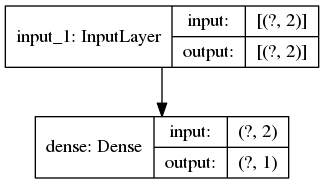

In [9]:
model_logistic = reg_logistica(X_[:80,:].shape[1])
keras.utils.plot_model(model_logistic, show_shapes=True)

### Compilación del modelo

El entrenamiento, evaluación y predicción funcionan de la misma forma tanto en el modelo funcional como en el modelo secuencial de Keras.

Antes de entrenar el modelo se debe especificar la función de costo que se va a utilizar, un optimizador y, opcionalmente, una métrica para evaluar modelo. Se define descenso del gradiente como optimizador de la función de costo entropía cruzada binaria y se compila el modelo que se evaluará con la métrica precisión binaria. El parámetro "metrics" es una lista donde se puede incluir cualquier número de métricas con las cuales se quiera evaluar el entrenamiento.

Keras incorpora varias funciones de costo, optimizadores y metricas que están disponibles por defecto, algunas de ellas son:

Optimizadores:

 - SGD
 - RMSprop
 - Adam

Funciones de costo:

 - MeanSquaredError
 - KLDivergence
 - CosineSimilarity

Métricas:

 - AUC
 - Precision
 - Recall

Asimismo, pueden usarse funciones de costo, optimizadores y métricas definidos por el usuario.

In [10]:
taza_aprendizaje = 0.5
sgd = keras.optimizers.SGD(lr=taza_aprendizaje)
model_logistic.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

### Entrenamiento

Para el entrenamiento se emplea la función "fit", la cual parte los datos en batches, en este caso un solo batch, e itera sobre todo el dataset un determinado número de épocas. El método retorna un historial donde se encuentra el valor de la función de costo y de la métrica de evaluación durante cada época de entrenamiento.

In [43]:
history = model_logistic.fit(X_[:80,:], y_[:80], batch_size=1, epochs=5, shuffle=False)

Epoch 1/5
80/80 [==============================] - 0s 743us/step - loss: 0.0463 - binary_accuracy: 0.9750
Epoch 2/5
80/80 [==============================] - 0s 866us/step - loss: 0.0489 - binary_accuracy: 0.9750
Epoch 3/5
80/80 [==============================] - 0s 866us/step - loss: 0.0487 - binary_accuracy: 0.9750
Epoch 4/5
80/80 [==============================] - 0s 816us/step - loss: 0.0485 - binary_accuracy: 0.9750
Epoch 5/5
80/80 [==============================] - 0s 836us/step - loss: 0.0483 - binary_accuracy: 0.9750


In [38]:
print(history.history.keys())

dict_keys(['loss', 'binary_accuracy'])


In [39]:
print(history.history['loss'])

[0.05095420405268669, 0.05349702388048172, 0.05360320955514908, 0.05340296030044556, 0.05313349515199661, 0.05282454937696457, 0.05249698832631111, 0.052162595093250275, 0.051827721297740936, 0.05149583891034126, 0.05116848275065422, 0.050846584141254425, 0.05053035542368889, 0.05021984130144119, 0.04991498216986656]


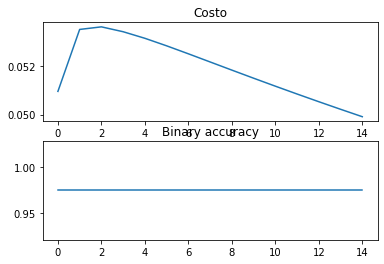

In [40]:
fig1 = plt.figure()#(figsize=(5.0, 4.0))
ax_ = fig1.add_subplot(211)
ax_.set_title('Costo')
ax_.plot(history.history['loss'])

ax1_ = fig1.add_subplot(212)
ax1_.set_title('Binary accuracy')
ax1_.plot(history.history['binary_accuracy'])

In [36]:
model_logistic.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [16]:
print(len(model_logistic.layers[1].weights))
print(model_logistic.layers[1].weights[0])
print(model_logistic.layers[1].weights[1])
print(model_logistic.layers[1].get_weights()[0][0][0]) # Este es W
print(model_logistic.layers[1].get_weights()[1][0]) # Este es el bias b

2
<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
array([[5.7338023],
       [0.4598806]], dtype=float32)>
<tf.Variable 'dense/bias:0' shape=(1,) dtype=float32, numpy=array([1.3847665], dtype=float32)>
5.7338023
1.3847665


Los pesos finales de entrenamiento $W$ junto con el bias $b$ se llevan a variables para visualizar

In [17]:
W = model_logistic.layers[1].get_weights()[0]
b = model_logistic.layers[1].get_weights()[1][0]

### Evaluación

In [21]:
test_scores = model_logistic.evaluate(X_[80:90,:], y_[80:90], verbose=2)

1/1 - 0s - loss: 0.0137 - binary_accuracy: 1.0000


### Predicciones

Como último paso se aplica el método "predict" para calcular las predicciones del modelo ante un dato de entrada cualquiera. En este caso usamos los diez datos que se reservaron para prueba.

El método predict retorna la probabilidad de que la entrada pertenezca a una clase u otra. Aplicando un umbral se obtiene el resultado final de la predicción. En este caso obtenemos que 9/10 predicciones realizadas por el modelo fueron correctas para una precisión de 90%.

In [23]:
predicciones = model_logistic.predict(X_[90:,:])
predicciones = np.where(predicciones>0.5, 1, 0).reshape((10,))

In [25]:
print('Predicciones = {}\n'.format(predicciones))
print('Ground truth = {}'.format(y_[90:]))

Predicciones = [0 1 1 1 1 1 0 0 1 0]

Ground truth = [0 1 1 0 1 1 0 0 1 0]


In [26]:
res = np.sum(predicciones==y_[90:])
print(res)

9


## 2. Implementación de Regresión Logística usando el modelo secuencial de Keras

El modelo secuencial de Keras es apropiado para una pila de capas, donde cada capa tiene exactamente un tensor de entrada y un tensor de salida.

No se recomienda aplicar un modelo secuencial cuando:

 - El modelo tiene múltiples entradas o múltiples salidas
 - Cualquier capa del modelo tiene múltiples entradas o múltiples salidas
 - Se necesita compartir capas entre modelos
 - Se va a emplear una topología no lineal (e.g. una conexión residual, un modelo multi-ramas)


### Creación del modelo secuencial

El modelo se crea pasando una lista de capas al constructor secuencial. Existen dos métodos para realizar esto:

1. Crear el modelo secuencial incrementalmente por medio del método "add":

In [58]:
def reg_logistica_sec_1(dim):
    model = keras.Sequential()
    model.add(keras.Input(dim, ))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
    
    return model

2. Pasando una lista de capas al constructor secuencial:

In [59]:
def reg_logistica_sec_2(dim):
    model = keras.Sequential([
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

Debido a que el modelo secuencial se comporta como una lista de capas, es posible utilizar métodos propios de las listas como por ejemplo "pop" para eliminar una capa.

Seguiremos utilizando el constructor del método 1 ya que ambos son equivalentes.

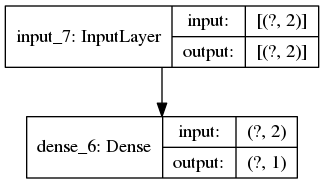

In [72]:
modelo_secuencial = reg_logistica_sec_1(X_[:80,:].shape[1])
keras.utils.plot_model(modelo_secuencial, show_shapes=True)

### Compilación y entrenamiento

Como se dijo anteriormente, el proceso de compilación del modelo y entrenamiento es el mismo para los métodos funcional y secuencial, por lo tanto se procede directamente a utilizarlos con los mismos parámetros, es decir, la misma elección de optimizador, función de costo y métricas:

In [63]:
sgd = keras.optimizers.SGD(lr=0.5) #SGD=Stochastic Gradient Descent
modelo_secuencial.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [64]:
history = modelo_secuencial.fit(X_[:80,:], y_[:80], batch_size=1, epochs=5, shuffle=False)

Epoch 1/5
80/80 [==============================] - 0s 752us/step - loss: 0.0715 - binary_accuracy: 0.9750
Epoch 2/5
80/80 [==============================] - 0s 782us/step - loss: 0.0697 - binary_accuracy: 0.9750
Epoch 3/5
80/80 [==============================] - 0s 799us/step - loss: 0.0681 - binary_accuracy: 0.9750
Epoch 4/5
80/80 [==============================] - 0s 827us/step - loss: 0.0668 - binary_accuracy: 0.9750
Epoch 5/5
80/80 [==============================] - 0s 821us/step - loss: 0.0657 - binary_accuracy: 0.9750


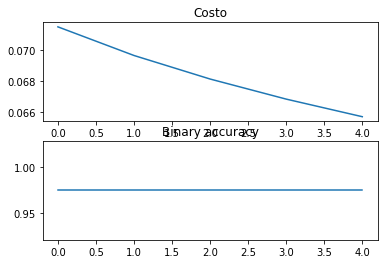

In [65]:
fig2 = plt.figure()#(figsize=(5.0, 4.0))
ax_ = fig2.add_subplot(211)
ax_.set_title('Costo')
ax_.plot(history.history['loss'])

ax1_ = fig2.add_subplot(212)
ax1_.set_title('Binary accuracy')
ax1_.plot(history.history['binary_accuracy'])

### Predicción

In [68]:
pred_sec = modelo_secuencial.predict(X_[90:,:])
pred_sec = np.where(predicciones>0.5, 1, 0).reshape((10,))

In [69]:
print('Predicciones = {}\n'.format(pred_sec))
print('Ground truth = {}'.format(y_[90:]))

Predicciones = [0 1 1 1 1 1 0 0 1 0]

Ground truth = [0 1 1 0 1 1 0 0 1 0]


# Implementación de Regresión Logística en Pytorch

Como primer paso se caragan las librerías de pytorch

In [2]:
import torch
import torch.nn as nn

Se cargan las librerías de Sklearn necesarias para generar los datos

In [3]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
import matplotlib.pyplot as plt
import numpy as np

Se crean 100 datos artificiales con 6 características, dejando un 20% para pruebas.

In [5]:
X_, y_ = datasets.make_classification(n_samples=100, n_features = 6, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.2, random_state=1)

A continuación se extrae la media y se escalan los datos para que la varianza se igual a 1 con la función StandardScaler() de acuerdo con la siguiente ecuación:

$$z=\frac{x-\mu}{s}$$

Donde $x$ es el dato de entrada, $\mu$ la media de los datos y $s$ la desviación estándar. El resultado $z$ es el dato normalizado.

La estandarización de un conjunto de datos es un requerimiento común de los algoritmos de aprendizaje máequinas, algunos de ellos pueden tener un mal desempeño si los datos no presentan una forma parecida a una distribución normal. Por ejemplo, muchos elementos usados en la función objetivo de un algoritmo de aprendizaje (como el kernel RBF de una máquina de soporte vectorial) asumen que los datos se encuentran centrados y escalados. 

In [6]:
sc = StandardScaler()

El método "fit" realiza el cálculo de la media y la desviación estándar, mientras que el método "transform" realiza las operaciones de centrado (restar la media) y escalado (dividir por la desviación estándar).

In [7]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Ahora se pasan los datos, que están almacenados en forma de arreglos de numpy, a tensor que es la estructura de datos especializada de pytorch. Los tensores se usan para codificar las entradas y salidas de un modelo así como sus parámetros. Los tensores son similares a arreglos de numpy con la diferencia que los tensores pueden enviarse a la GPU u otros aceleradores de hardware.

In [8]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

Por defecto los tensores se almacenan en CPU pero pueden pasarse a la GPU con el método "to", preguntando primero por su disponibilidad:

In [9]:
if torch.cuda.is_available():
    X_train = X_train.to('cuda')
    X_test = X_test.to('cuda')
    y_train = y_train.to('cuda')
    y_test = y_test.to('cuda')

In [10]:
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

In [11]:
n_samples, n_features = X_.shape

Para crear el constructor de un modelo en pytorch se tienen dos requerimientos. El primero es el método "_init_" que referencia el módulo "nn.Module" y es donde se definen las capas totalmente conectadas del modelo.

El segundo requerimiento especifica como se pasaran los datos a través del modelo. Esto se hace definiendo el método "forward", el cual lleva los datos al grafo computacional.

In [12]:
class LogisticRegression(nn.Module):

    def __init__(self, n_input_features):
        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_predicted = torch.sigmoid(self.linear(x))
        return y_predicted

In [13]:
model = LogisticRegression(n_features)

Pytorch requiere que definamos la función de costo, entropía binaria cruzada; y el optimizador, gradiente estocástico

In [14]:
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=learning_rate)

Y ahora se crea el ciclo de entrenamiento que se repetirá un determinado número de épocas.

In [15]:
num_epochs = 100

for epoch in range(num_epochs):
    
    # Se prealimenta (feed-forward) la red y se obtiene la salida "y_predicted"
    y_predicted = model(X_train)
    
    # Se calcula el costo como una función a la que se le aplican la salidas y las etiquetas
    loss = criterion(y_predicted, y_train)

    # Al costo se le aplica el método "backward" que calcula el gradiente en cada una de las capas de la red
    # Recordemos que el gradiente representa la derivada parcial de la función de costo respecto de los pesos 
    # de la red
    loss.backward()

    # Ya calculado el gradiente se actualizan los pesos dando un pequeño paso en la dirección negativa 
    # del gradiente
    optimizer.step()

    # Se limpia el gradiente para la siguiente iteración ya que este parámetro es acumulativo
    optimizer.zero_grad()

    if(epoch+1) % 10 == 10:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')

In [16]:
with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy =  {acc:.4f}')

accuracy =  1.0000


In [17]:
#with torch.no_grad():
model.eval()
y_predicted = model(X_test)
y_predicted_cls = y_predicted.round()
acc2 = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
print(f'accuracy =  {acc2:.4f}')

accuracy =  1.0000
